<a href="https://colab.research.google.com/github/Fruitful-Esther/Airline-Passenger-Satisfaction-KNN-model/blob/main/Airline_Passenger_Satisfaction_with_KNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description:**

Using Exploratory Data Analysis and a Supervised Learning Model (KNN), the goal of this project is to explore and evaluate the data to identify factors that affects an airline's passenger's satisfaction and evaluate how these factors contribute to the loyalty and disloyalty of passengers to the airline.

In [93]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
#import scikitplot

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [120]:
!pip install scikit-plot #to install scikitplot in google colab
import scikitplot.metrics as skplt

In [ ]:
#reading files
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/passenger_satisfaction_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/passenger_satisfaction_test.csv')

In [ ]:
data.head() #top 5 rows of the data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True) #dropping columns 'Unnamed:0' and 'id'

In [ ]:
test_data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True) #dropping columns 'Unnamed:0' and 'id'for the test data as well

In [ ]:
print(f"Number of rows in training data: {data.shape[0]}")
print(f"Number of rows in test data: {test_data.shape[0]}")

Number of rows in training data: 103904
Number of rows in test data: 25976


In [ ]:
data.info() #checking for info such as data type of each column,number of entries per column, and whether or not null values exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
data.describe() #statistical summary of the dataset

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Insight 1:** The average departure delay is about 14.81 minutes, approximately 15 minutes. Also the average arrival delay in minutes in 15.17 minutes also approximately 15 minutes. This resonates with the fact that departure delays is the major cause of arrival delays, with about 30 seconds on the average that could be as a result of operational reasons such as weather, tower instructions, longer taxi, and other reasons.

**Insight 2:** While we have flights that were not delayed at all (from minimum delay of 0mins), there are flights that were delayed for more than 26 hours (from maximum departure delay of 1592minutes)

**Insight 3:** Inflight wifi service has the lowest mean rating. This could imply that poor inflight wifi service is the most frustrating experience for most passengers on board. Apart from poor inflight wifi service, more passengers also experience difficulty in booking flights online.

In [39]:
#identifying categorical columns i.e. columns that have to do with rating
cat_col = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
data[cat_col] = data[cat_col].astype(object) #converting data type of all categorical columns to object

**Exploratory Data Analysis**

In [42]:
cat_columns = data.select_dtypes(object).columns.to_list() #Grouping all the object datatyped columns into a list called cat_columns
print('Categorical Columns:', cat_columns)
print()
num_columns = data.select_dtypes(np.number).columns.to_list() #Grouping all the number datatyped columns into a list called num_columns
print('Numerical Columns:', num_columns)

Categorical Columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

Numerical Columns: ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


**Univariate Data Analysis**

In [47]:
data.shape

(103904, 23)

In [49]:
#selecting 1000 random rows from the original dataset since we have 103904 in the original dataset and that is quite too much to deal with
data_sample = data.sample(1000)
data_sample.shape

(1000, 23)

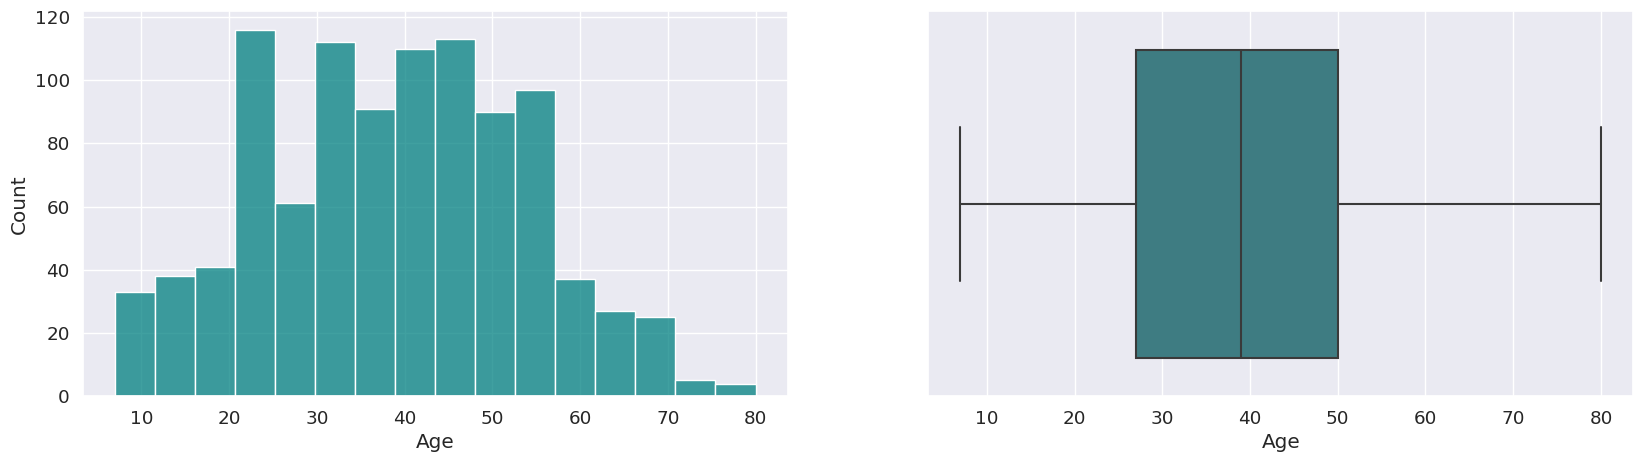

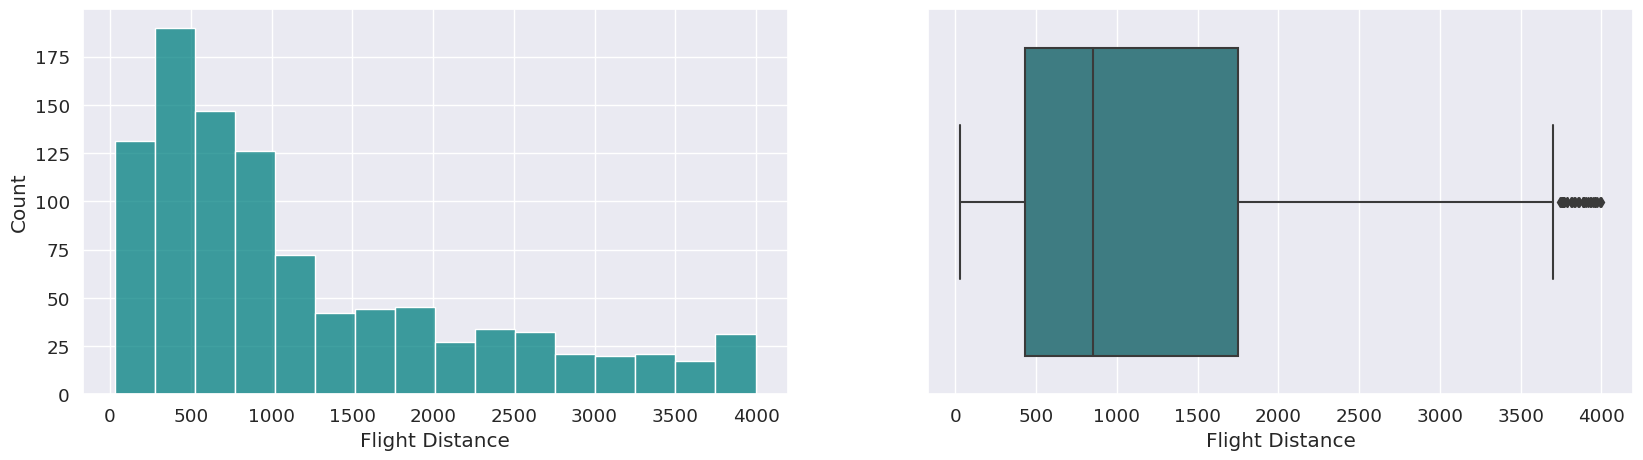

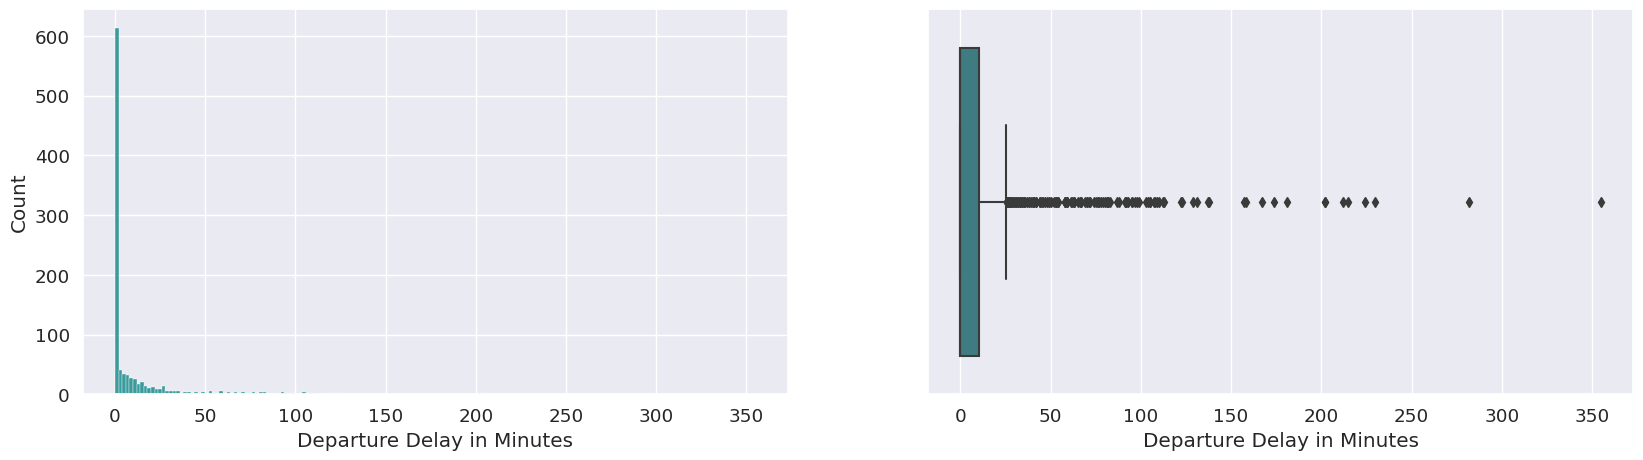

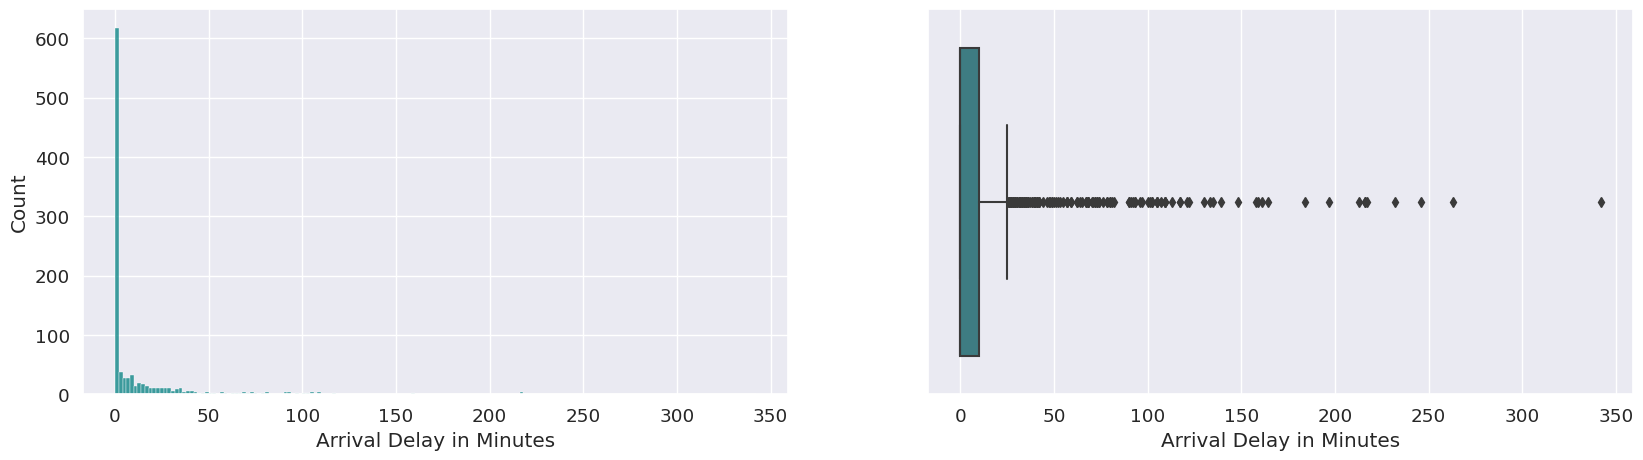

In [51]:
sns.set_context('notebook', font_scale= 1.2) #setting seaborn context to be appropriate for jupyter notebook and the font scale to a scaling factor that increases the font size by 20%
for col in num_columns: #for all columns in the list num_columns, peform the iterations below
    fig, ax = plt.subplots(1, 2, figsize = (20, 5)) #creating a figure with two subplots and setting their widths to 20 inches and height to 5 inches
    sns.histplot(data_sample[col], ax = ax[0], color= 'teal')#plot a histogram on the first plot
    sns.boxplot(x = data_sample[col], ax= ax[1], palette= 'crest') #plot a boxplot on the second plot

**Insight 1:** Majority of the flights have no delay, therefore both the Departure delay and arrival delay distributions are heavily skewed.

**Insight 2:** Majority of the flights have distance lesser than 1000 Km and only some have distance greater than 4000 Km

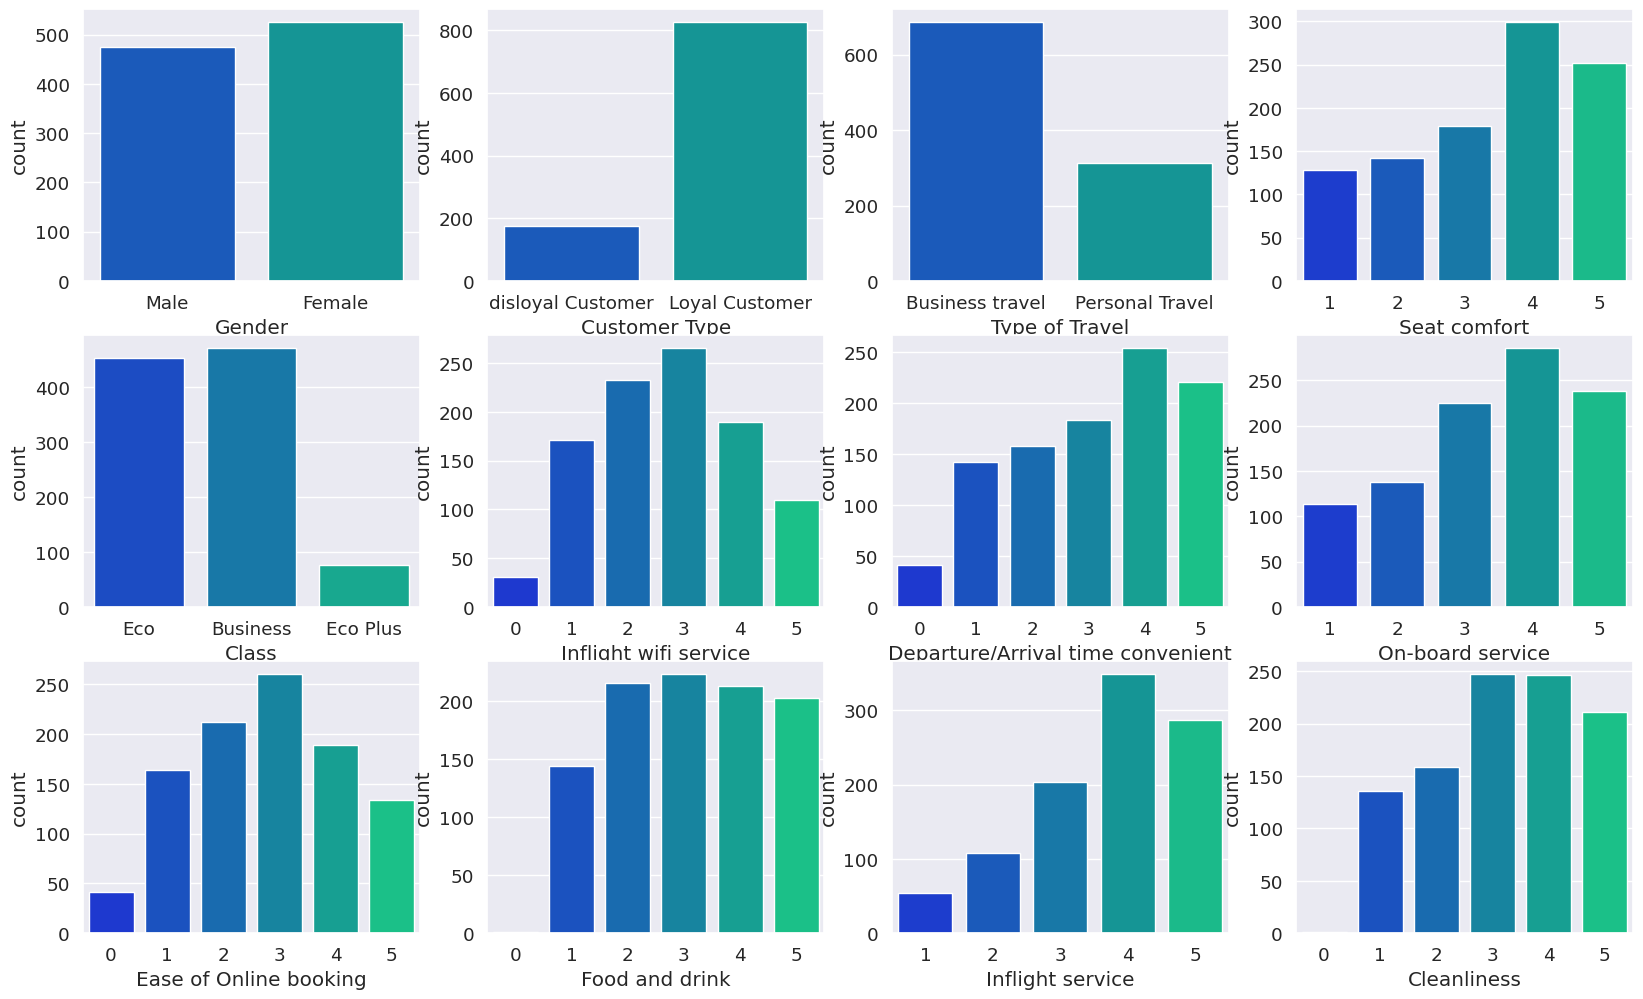

In [52]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12)) #creating a figure with a 3x4 grid of subplots
sns.countplot(x = 'Gender', data = data_sample, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = data_sample, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = data_sample, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = data_sample, palette= 'winter', ax = axes[0, 3]);
sns.countplot(x = 'Class', data = data_sample, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = data_sample, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = data_sample, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'On-board service', data = data_sample, palette= 'winter', ax = axes[1, 3]);
sns.countplot(x = 'Ease of Online booking', data = data_sample, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'Food and drink', data = data_sample, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Inflight service', data = data_sample, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Cleanliness', data = data_sample, palette= 'winter', ax = axes[2, 3]);

**Insight:**

**Bivariate Analysis**

<ipython-input-54-d63c2ddaa9d8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_sample.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu") #Creating a heatmap of the correlation matrix


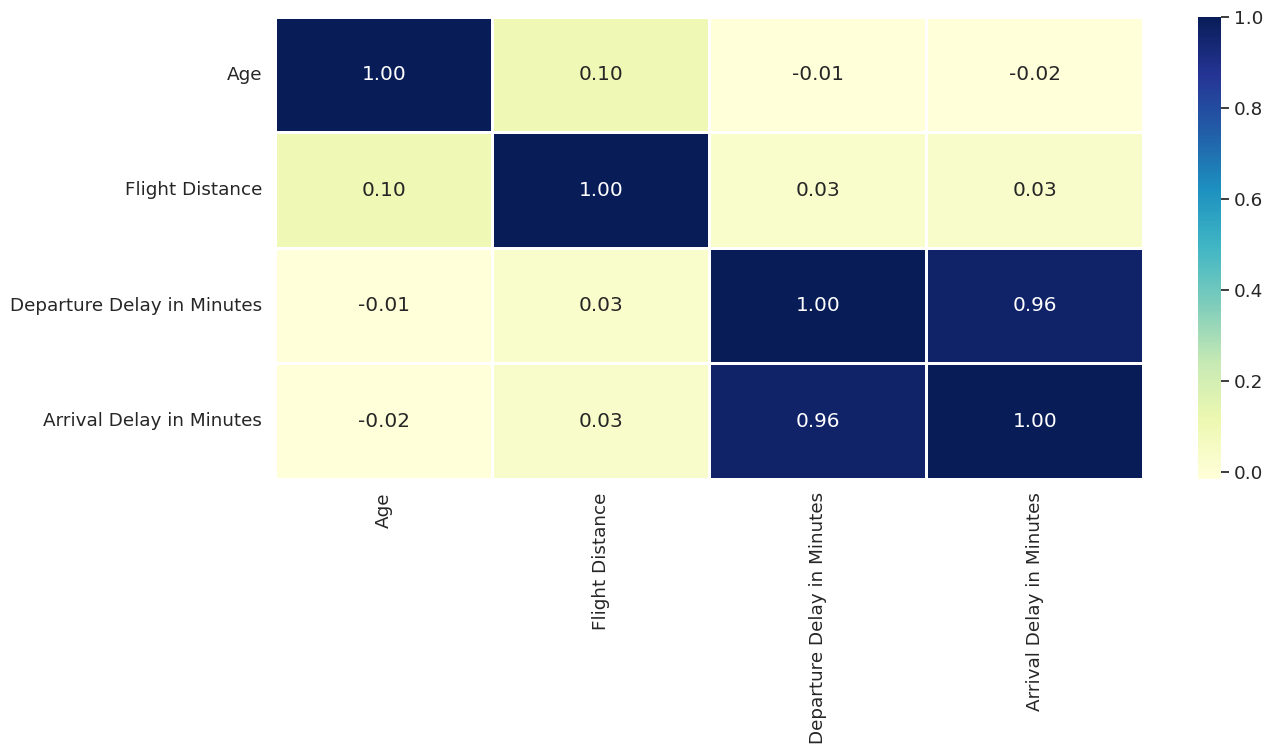

In [54]:
with sns.axes_style('white'): #setting this particular axes style to white background
    plt.figure(figsize= (14, 6))
    sns.heatmap(data_sample.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu") #Creating a heatmap of the correlation matrix

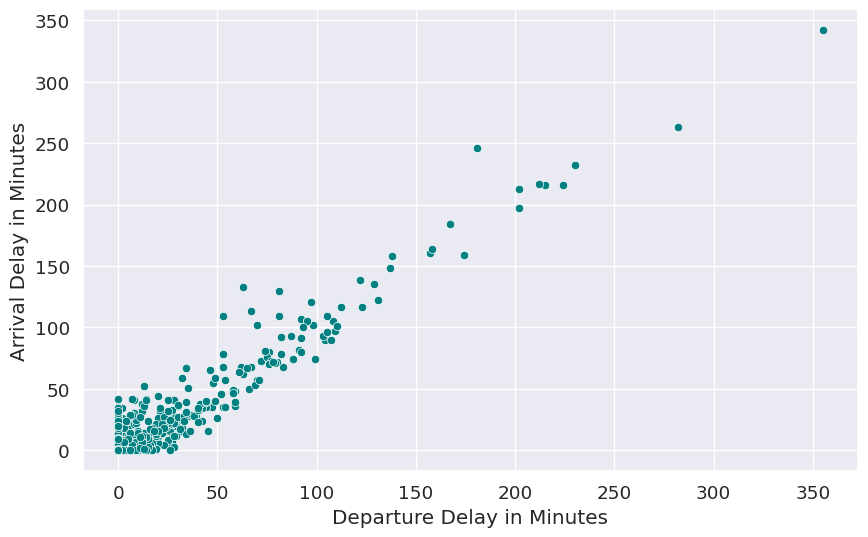

In [55]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = data_sample, color = 'teal')
plt.show()

**Insight:** Departure and Arrival delays are heavily correlated with each other. This agrees with the initial proposition that departure delays is often the cause of arrival delays, as such one of them should be dropped. For the purpose of this project, we drop departure delays.

In [56]:
data.drop('Departure Delay in Minutes', axis=1, inplace= True) #dropping departure delay from data since it is heavily correlated with arrival delay
test_data.drop('Departure Delay in Minutes', axis=1, inplace= True) #dropping departure delay from test data too

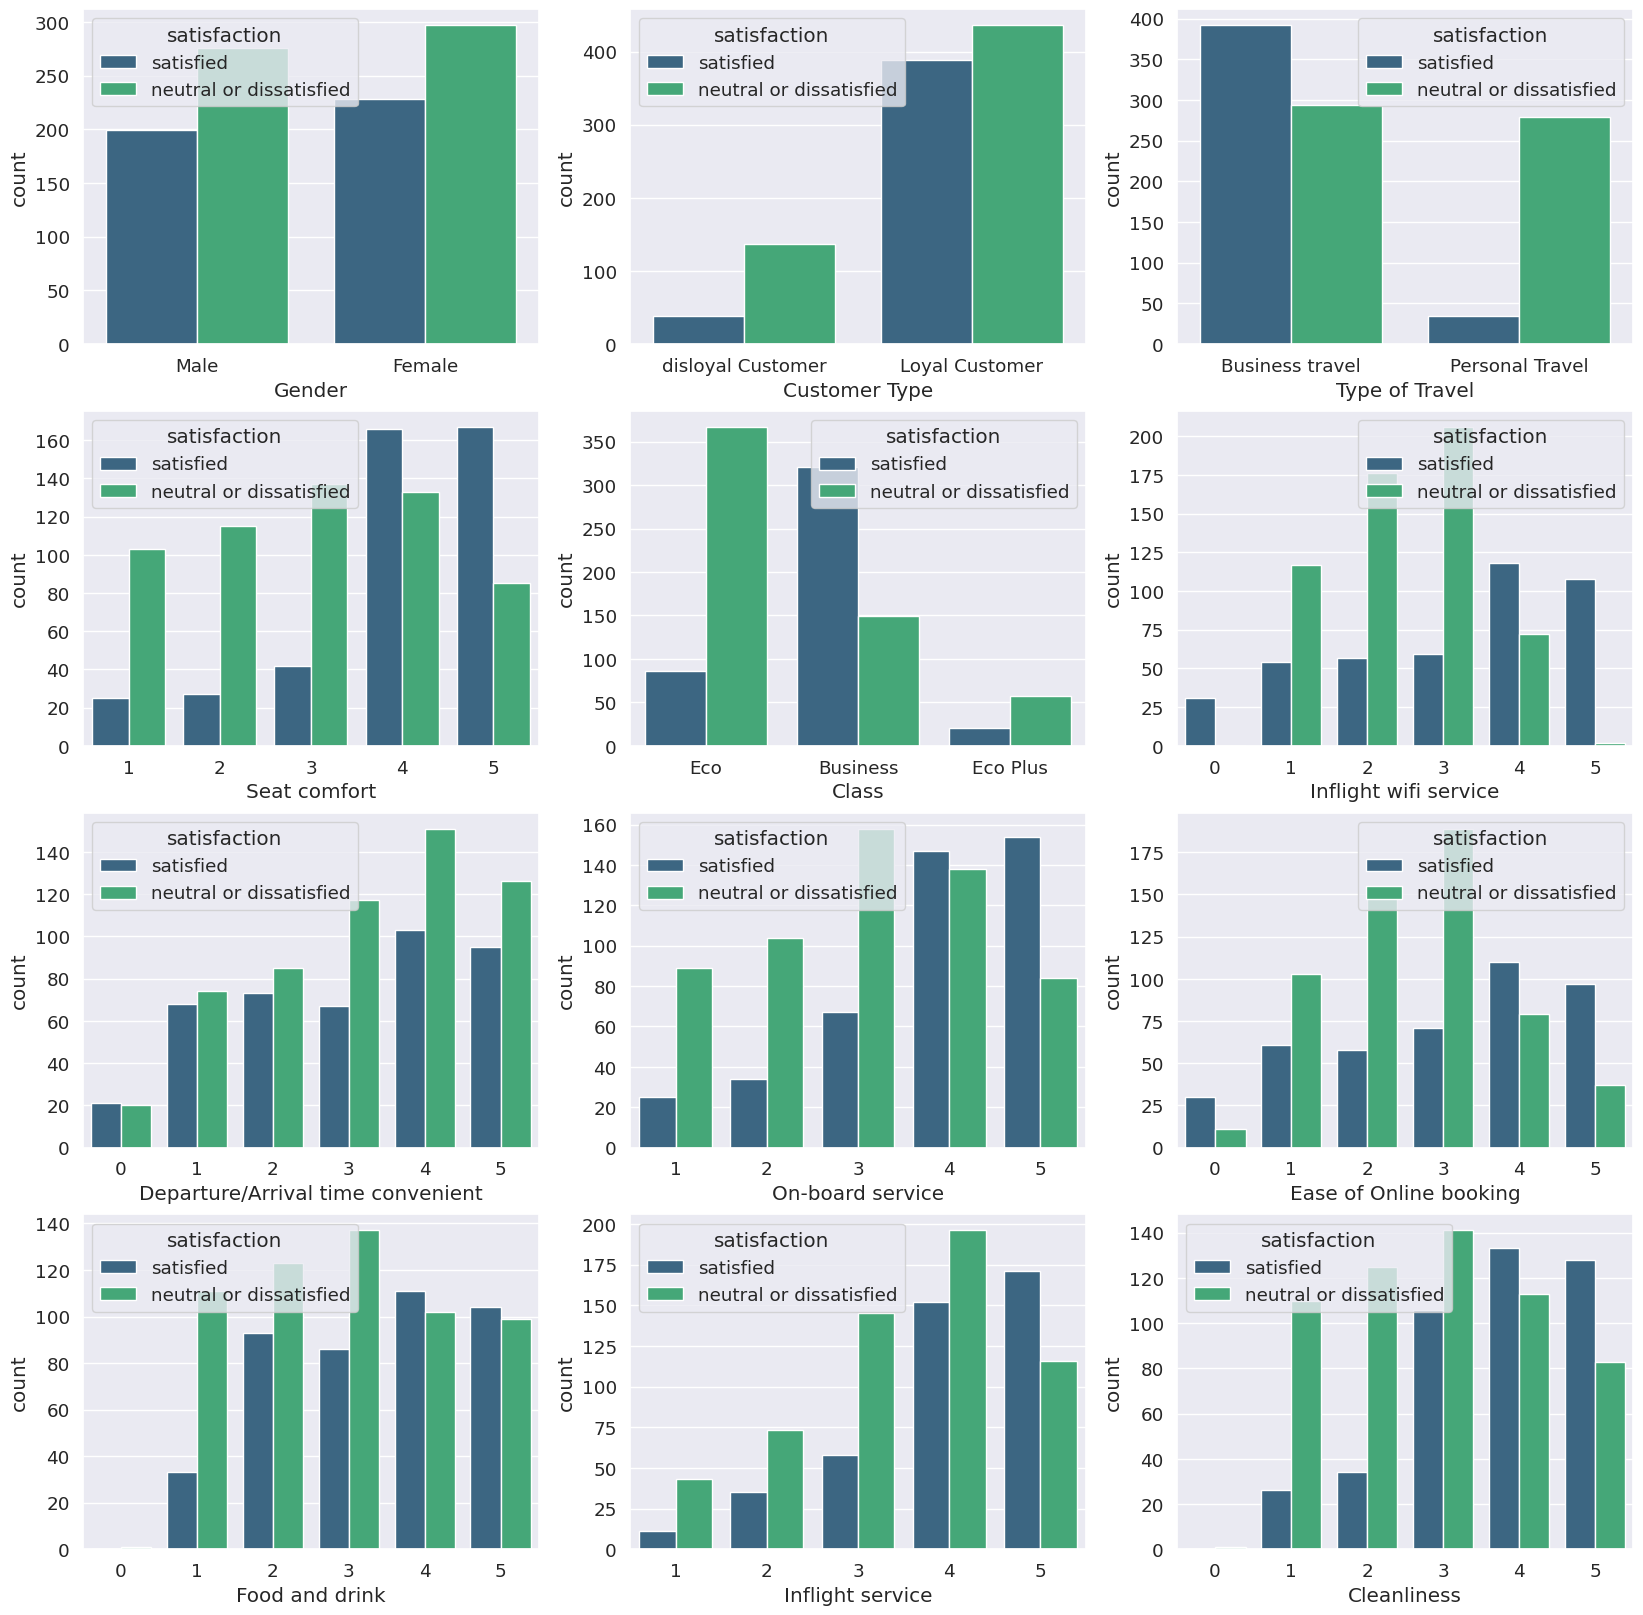

In [57]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20)) #creating a figure with a 4x3 grid of subplots
#plotting all columns to show satisfaction and dissatisfaction
sns.countplot(x = 'Gender', data = data_sample, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = data_sample, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 2]);


**Insight 1:** Passengers travelling for business purposes are more satisfied as compared to passengers who are travelling for other purposes. This can be further looked into to ascertain if passengers traveling for business purposes travel on week days while passengers traveling for personal purposes travel on weekends or on holidays. Evaluating customer satisfaction during weekdays and weekends/holidays can further reveal whether delays are more likely on weekends than on weekdays (perhaps due to multiple boarding on weekends and on holidays).

**Insight 2:** Business class people are more satisfied as compared to people travelling in eco class.

**Insight 3:** Majority of the people who gave 4 or 5 rating in any of the categories were generally satisfied with the airline.

**Preprocessing 1: Data Cleaning**

**A:Dealing with missing values**

In [58]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

There are a total of 310 missing valus in the arrival delay in minutes column. Since the arrival delay plot shows that arrival delay is heavily skewed, then it is a good choice to fill the missing values with the median arrival delay value.

In [90]:
median_val = data['Arrival Delay in Minutes'].median() #declaring a new variable to house the median value
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(median_val) #replacing all 'na' values in the 'Arrival Delay in Minutes' column with the median value
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(median_val) #replicating the same for the test dataset

In [89]:
data[cat_columns].nunique()

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

Some of the columns have missing values represented as 0. We can treat this missing values by replacing them with the mode of the columns.


In [103]:
#identifying columns containing 0 and placing them in a list 'columns_containing_0'
columns_containing_0 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness']
modes = data[columns_containing_0].mode() #declaring variable modes to house the mode of all the columns
data[columns_containing_0] = data[columns_containing_0].replace({'0': modes}) #replacing the 0 values with the mode
test_data[columns_containing_0] = test_data[columns_containing_0].replace({'0': modes}) #doing the same for the test data
data[columns_containing_0].isna()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Checkin service,Inflight service,Cleanliness
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,False,False,False,False,False,False,False,False,False,False,False,False,False
103900,False,False,False,False,False,False,False,False,False,False,False,False,False
103901,False,False,False,False,False,False,False,False,False,False,False,False,False
103902,False,False,False,False,False,False,False,False,False,False,False,False,False


**B:Feature Transformation**

Feature transformation is the process of modifying or encoding the features (variables) in a dataset to make them more suitable for machine learning algorithms or to extract more meaningful information from the data. It involves applying various mathematical or statistical techniques to transform the original features into a new representation. Feature Transformation can be beneficial for scaling and normalization, handling skewed distributions, encoding catgorical variables, dimensionality reduction, creating interaction features.

For this dataset, features such as Flight Distance, Departure Delays and Arrival Delays were skewed (clearly visible from the boxplot), therefore it will be suitable to apply log transformation to them.

In [80]:
#logarithmic transformation to make the columns more normally distributed and to reduce the impact of outliers.
data['Flight Distance'] = np.log1p(data['Flight Distance'])
test_data['Flight Distance'] = np.log1p(test_data['Flight Distance'])

data['Arrival Delay in Minutes'] = np.log1p(test_data['Arrival Delay in Minutes'])
test_data['Arrival Delay in Minutes'] = np.log1p(test_data['Arrival Delay in Minutes'])

In preparation for machine learning model that will require numerical inputs, we encode the categorical variables

In [81]:
#encoding categorical variables in the entire dataset
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
data['Class'] = data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

#doing the same encoding for the test dataset
test_data['Gender'] = test_data['Gender'].map({'Male' : 0, 'Female' : 1})
test_data['Customer Type'] = test_data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
test_data['Class'] = test_data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

**Preprocessing 2: Feature Selection and Scaling**

In [104]:
X_train = data.drop('satisfaction', axis = 1) #dropping the satisfaction column from the dataset in order to separate it into a variable of its own
y_train = data.satisfaction #assigning the satisfaction column to variable y_train

#doing the same for the test_data
X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data.satisfaction

The StandardScaler class is a preprocessing class in scikit-learn that implements the standardization scaling method. It is commonly used to standardize features by subtracting the mean and dividing by the standard deviation, resulting in features with zero mean and unit variance.

In [105]:
s = StandardScaler() #creating an instance of the StandardScaler class from scikit-learn and assigning it to the variable s.
X_train = s.fit_transform(X_train) #Fit-Compute mean and standard deviation of the X_train data, and scale (transform) the data based on computed statistics
X_test = s.transform(X_test) #do same for the X_test data

**Supervised Learning: K-Nearest Neighbors**

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression tasks. It is a non-parametric algorithm that makes predictions based on the k closest training samples in the feature space.

The KNeighborsClassifier class is a supervised learning algorithm that implements the K-Nearest Neighbors classification algorithm. It is used for solving classification problems by finding the k nearest neighbors to a given data point and predicting its class based on the majority class among those neighbors.

Scikit-learn is a popular Python library that provides an implementation of the KNN algorithm. You can use the KNeighborsClassifier class for classification tasks and the KNeighborsRegressor class for regression tasks.

In [106]:
knn = KNeighborsClassifier(n_neighbors= 3) #creating a model knn:n_neighbors=3 specifies the number of neighbors to consider when making predictions. The algorithm will find the 3 closest neighbors to a data point and use their class labels to determine the predicted class for that data point.
knn.fit(X_train, y_train)#training the model
k = KFold(n_splits = 5)  #This data will be split into 5 folds. The KFold class is a method for splitting a dataset into multiple "folds" or subsets for cross-validation. It is commonly used to assess the performance and generalization of a machine learning model.
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()#see next text column for details on this line of code
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.923


**score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()**

Here's a breakdown of what the code does:

cross_val_score is a function from scikit-learn that performs cross-validation on a given model using the specified dataset.

knn represents the KNN model that you want to evaluate.

X_train is the input feature matrix (or DataFrame) containing the training data.

y_train is the target label vector (or Series) containing the corresponding labels for the training data.

scoring='accuracy' specifies the evaluation metric to be used, which is accuracy in this case. Accuracy measures the proportion of correctly predicted samples.

cv=k specifies the cross-validation strategy, which is the KFold instance k that you created earlier.

The .mean() method is called on the result of cross_val_score to calculate the mean accuracy score across all the cross-validation folds.

The cross_val_score function internally performs the following steps:

Splits the training data into k folds based on the KFold strategy.
For each fold, trains the knn model on the training subset and evaluates its performance on the corresponding test subset.
Calculates the evaluation metric (accuracy in this case) for each fold.
Returns an array containing the evaluation metric scores for each fold.
By taking the mean of these scores, you obtain an estimate of the model's performance on unseen data, considering the entire training set.

Note that the cross_val_score function automatically handles the training and evaluation process for each fold, so you don't need to manually loop over the folds and split the data yourself.

Finally, the mean accuracy score is assigned to the variable score.

In [107]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.923


In [108]:
print(classification_report(y_test, y_pred))#y_test represents the true labels of the test set, and y_pred represents the predicted labels obtained from the model.

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     14573
           1       0.94      0.88      0.91     11403

    accuracy                           0.92     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



 Precision represents the proportion of true positive predictions out of all positive predictions.

 Recall represents the proportion of true positive predictions out of all actual positive samples.

 F1-score is the harmonic mean of precision and recall.

The support column indicates the number of samples in each class.

**Choosing a k value**

In [110]:
accuracy = [] # Empty list to store accuracy scores
for i in range(1,15): #loop iterates over the range of values from 1 to 14 (excluding 15)

    knn = KNeighborsClassifier(n_neighbors=i)# Create KNN model with current value of n_neighbors
    knn.fit(X_train,y_train)#Train the model
    pred_i = knn.predict(X_test)# Make predictions on the test set
    accuracy_i = accuracy_score(y_test, pred_i)# Calculate accuracy score
    accuracy.append(accuracy_i)# Append accuracy score to the list

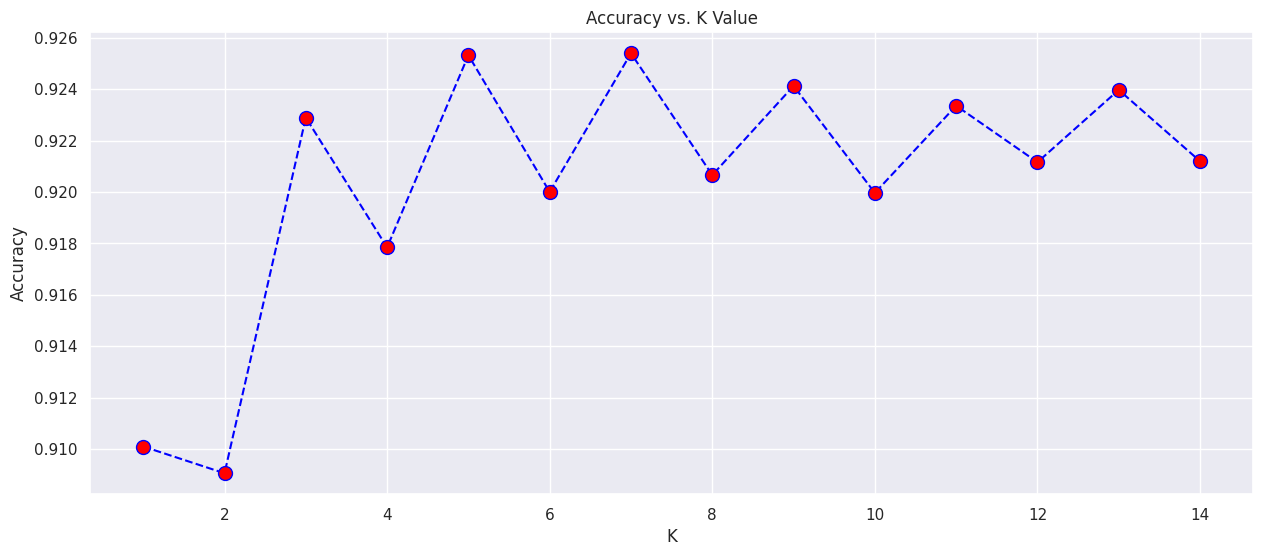

In [111]:
plt.figure(figsize=(15,6))# Create a new figure with a specific size
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)# Plot the accuracy scores with the defined colors and styles
plt.title('Accuracy vs. K Value')#the title of the plot
plt.xlabel('K')# Set the label for the x-axis
plt.ylabel('Accuracy')# Set the label for the y-axis
plt.show()# Display the plot

This above plot visualizes how the accuracy of the KNN classifier changes with different values of n_neighbors (K), helping us determine the optimal value of K that yields the highest accuracy.

Maximum accuracy occurs when k = 5, so we  retrain our model for k = 5

In [112]:
knn = KNeighborsClassifier(n_neighbors = 5)# Creating KNN model with current value of 5_neighbors
knn.fit(X_train, y_train)#training the model
y_pred = knn.predict(X_test)#making predictions on the test set

**Evaluating the model**

In [114]:
#calculating the accuracy score of the predictions made by the KNN model on the test set (y_test and y_pred) and printing it as a percentage in 2 decimal places.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 92.53%


In [115]:
print(classification_report(y_test, y_pred))#printing the classification report for evaluating the performance of a classification model on the test set.

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     14573
           1       0.95      0.88      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.92     25976



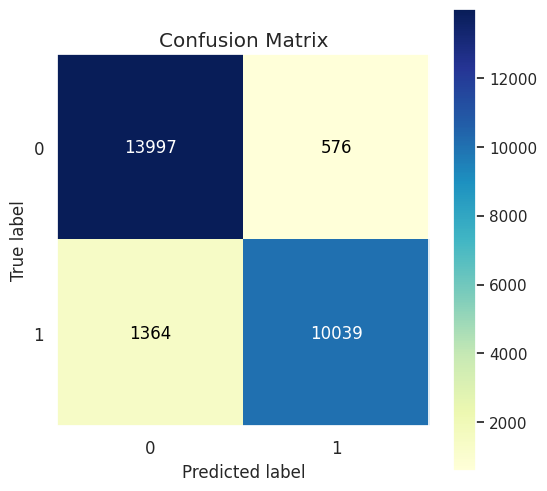

In [121]:
#!pip install scikit-plot

#import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'YlGnBu');

The confusion matrix plot shows the number of samples that were correctly or incorrectly predicted for each class. The diagonal elements of the matrix represent the number of correct predictions for each class, while the off-diagonal elements represent the number of incorrect predictions.

The color intensity or shade in the plot represents the magnitude of the counts, with brighter colors indicating higher counts. The colorbar on the side of the plot provides a visual guide for the count values.

The confusion matrix plot helps to visualize the performance of a classification model by providing insights into the types of errors made and the distribution of predictions across classes.